# KNN 아이리스  2진 분류

In [ ]:
### 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [3]:
iris.drop(['Id'], axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df=iris.drop(['Id'], axis=1)

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df['Species'].map({
                  'Iris-setosa':0, 
                  'Iris-versicolor':1, 
                  'Iris-virginica':2
})

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df['Species']=df['Species'].map({
                  'Iris-setosa':0, 
                  'Iris-versicolor':1, 
                  'Iris-virginica':2
})

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X = df.drop(['Species'], axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# X = df.iloc[:, :-1] y = df.iloc[: ,-1]

In [16]:
y = df['Species']

X.shape, y.shape

((150, 4), (150,))

In [11]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [195]:
y

93     1
0      0
69     1
139    2
87     1
      ..
95     1
100    2
67     1
125    2
55     1
Name: Species, Length: 150, dtype: int64

In [ ]:
### 테스트 데이터 분리

In [18]:
!pip install scikit-learn --user

In [196]:
from sklearn.utils import shuffle
shuffle(X, y)

[     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 93             5.0           2.3            3.3           1.0
 41             4.5           2.3            1.3           0.3
 65             6.7           3.1            4.4           1.4
 73             6.1           2.8            4.7           1.2
 95             5.7           3.0            4.2           1.2
 ..             ...           ...            ...           ...
 56             6.3           3.3            4.7           1.6
 85             6.0           3.4            4.5           1.6
 83             6.0           2.7            5.1           1.6
 134            6.1           2.6            5.6           1.4
 26             5.0           3.4            1.6           0.4
 
 [150 rows x 4 columns],
 93     1
 41     0
 65     1
 73     1
 95     1
       ..
 56     1
 85     1
 83     1
 134    2
 26     0
 Name: Species, Length: 150, dtype: int64]

In [214]:
X, y = shuffle(X, y)

num = int(150*0.8)

X_train = X.iloc[:num,:]   #120
X_test = X.iloc[num:,:]    #30
y_train = y.iloc[:num]     #120
y_test = y.iloc[num:]      #30

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [ ]:
### 정규화
- 최소,최대 정규화
- 표준화

In [215]:
mu = X_train['SepalLengthCm'].mean()
std = X_train['SepalLengthCm'].std()

mu, std

(5.845833333333333, 0.8017728081285507)

In [216]:
X_train['SepalLengthCm'] = (X_train['SepalLengthCm'] - mu)/std
print (X_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
104       0.815900           3.0            5.8           2.2
51        0.691177           3.2            4.5           1.5
89       -0.431336           2.5            4.0           1.3
46       -0.930230           3.8            1.6           0.2
0        -0.930230           3.5            1.4           0.2
..             ...           ...            ...           ...
44       -0.930230           3.8            1.9           0.4
40       -1.054954           3.5            1.3           0.3
147       0.815900           3.0            5.2           2.0
115       0.691177           3.2            5.3           2.3
16       -0.556059           3.9            1.3           0.4

[120 rows x 4 columns]


In [217]:
for col in X_train.columns:
    mu = X_train[col].mean()
    std = X_train[col].std()
    X_train[col] = (X_train[col]-mu)/std
    print(mu, std)
# X_test[col] = (X_test[col]-mu)/std

9.62193288008469e-17 1.0
3.0733333333333333 0.4123581158244306
3.73 1.7717009820361618
1.1975 0.7771378753547689


In [218]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,0.815900,-0.177839,1.168369,1.289990
51,0.691177,0.307176,0.434611,0.389249
89,-0.431336,-1.390377,0.152396,0.131894
46,-0.930230,1.762222,-1.202234,-1.283556
0,-0.930230,1.034699,-1.315120,-1.283556


In [219]:
print(X_train.describe().T)

               count          mean  std       min       25%       50%  \
SepalLengthCm  120.0  3.700743e-17  1.0 -1.928019 -0.930230 -0.057165   
SepalWidthCm   120.0  2.035409e-16  1.0 -2.117900 -0.662854 -0.177839   
PetalLengthCm  120.0 -7.401487e-18  1.0 -1.540892 -1.216345  0.265282   
PetalWidthCm   120.0 -2.960595e-17  1.0 -1.412233 -1.154879  0.131894   

                    75%       max  
SepalLengthCm  0.691177  2.312584  
SepalWidthCm   0.610311  3.217268  
PetalLengthCm  0.773268  1.789241  
PetalWidthCm   0.775281  1.676022  


In [220]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [221]:
X_train = X_train.values
y_train = y_train.values

In [222]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
### 데이터 전처리 함수

In [223]:
def get_iris(mode=None):
    iris = pd.read_csv('iris.csv')
    df = iris.drop(['Id'], axis=1).copy()
    df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']
   
    if(mode == 'bin'):
        df = df.loc[df['Species'] != 'Iris-virginica']
       
    df['Species']= df['Species'].map({
        'Iris-setosa':0,
        'Iris-versicolor':1,
        'Iris-virginica':2
    })
    X = df.drop(['Species'], axis=1)
    y= df['Species']

    X, y = shuffle(X, y)
    num = int(len(y)*0.8)
   
    X_train = X.iloc[:num,:]    
    X_test = X.iloc[num:,:]      
    y_train = y.iloc[:num]        
    y_test  = y.iloc[num:]      
   
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std

    return X_train, X_test, y_train, y_test
             
# X_test[col] = (X_test[col]-mu)/std

# 이진데이터 데이터 준비

In [ ]:
# df = df.loc[df['Species'] != 'Iris-virginica'] : Iris-virginica 삭제

In [206]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [207]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [244]:
df = iris['Species']
df.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [245]:
df.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [248]:
df = df.loc[df != 'Iris-virginica']

In [246]:
df.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [285]:
df.value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [296]:
def get_iris(mode=None):
    iris = pd.read_csv('iris.csv')
    df = iris.drop(['Id'], axis=1).copy()
    df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']
   
    if(mode == 'bin'):
        df = df.loc[df['Species'] != 'Iris-virginica']
       
    df['Species']= df['Species'].map({
        'Iris-setosa':0,
        'Iris-versicolor':1,
        'Iris-virginica':2
    })
    X = df.drop(['Species'], axis=1)
    y = df['Species']

    X, y = shuffle(X, y, random_state=2022)    #random_stae : X, y 값 고정
    num = int(len(y)*0.8)        #len(y)=100
   
    X_train = X.iloc[:num,:]     #80
    X_test  = X.iloc[num:,:]     #20
    y_train = y.iloc[:num]       #80
    y_test  = y.iloc[num:]       #20
   
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std

    return X_train, X_test, y_train, y_test

In [297]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


In [298]:
X_train, X_test, y_train, y_test = get_iris(mode="bin")

### 학습

In [299]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()    #객체생성, k값 미지정시 k=5
clf.fit(X_train, y_train)

KNeighborsClassifier()

### 평가

In [300]:
# 테스트
clf.score(X_test, y_test)

1.0

In [301]:
clf.score(X_train, y_train)

1.0

In [302]:
#예측
y_pred = clf.predict(X_test)

In [304]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [303]:
y_test

14    0
72    1
38    0
86    1
48    0
75    1
19    0
11    0
27    0
33    0
41    0
53    1
16    0
24    0
18    0
88    1
55    1
49    0
45    0
92    1
Name: Species, dtype: int64

In [ ]:
# y_pred, y_test 정확도 계산

In [305]:
# 평가지표 metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print('accuraccy:', acc)
print('precision:', pre)
print('recall:', rec)

accuraccy: 1.0
precision: 1.0
recall: 1.0


In [306]:
def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)

    print('accuraccy:', acc)
    print('precision:', pre)
    print('recall:', rec)

### 혼동행렬

In [308]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[13,  0],
       [ 0,  7]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

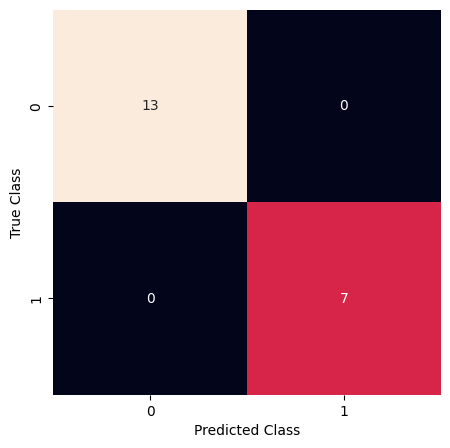

In [309]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cfm, annot=True, cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show